# _(Brette, Romain. 2004)_ LIF phase locking 

Implementation of the paper:

- Brette, Romain. "Dynamics of one-dimensional spiking neuron models." Journal of mathematical biology 48.1 (2004): 38-56.

Author:

- Chaoming Wang (chao.brain@qq.com)

In [1]:
import brainpy as bp

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# set parameters
num = 2000
tau = 100.  # ms
Vth = 1.  # mV
Vr = 0.  # mV
inputs = bp.math.linspace(2., 4., num)

In [4]:
class LIF(bp.NeuGroup):
  def __init__(self, size, **kwargs):
    super(LIF, self).__init__(size, **kwargs)
    
    self.V = bp.math.Variable(bp.math.zeros(size))
    self.spike = bp.math.Variable(bp.math.zeros(size))

  @staticmethod
  @bp.odeint
  def int_f(V, t):
    return (-V + inputs + 2 * bp.math.sin(2 * bp.math.pi * t / tau)) / tau

  def update(self, _t, _dt):
    V = self.int_f(self.V, _t)
    self.spike[:] = bp.math.asarray(V >= Vth, dtype=bp.math.float_)
    self.V[:] = bp.math.where(self.spike > 0., Vr, V)

In [5]:
group = LIF(num, monitors=['spike'])
group = bp.math.jit(group)

Compilation used 1.0360 s.
Start running ...
Run 10.0% used 0.137 s.
Run 20.0% used 0.248 s.
Run 30.0% used 0.339 s.
Run 40.0% used 0.432 s.
Run 50.0% used 0.535 s.
Run 60.0% used 0.626 s.
Run 70.0% used 0.727 s.
Run 80.0% used 0.824 s.
Run 90.0% used 0.915 s.
Run 100.0% used 1.003 s.
Simulation is done in 1.003 s.



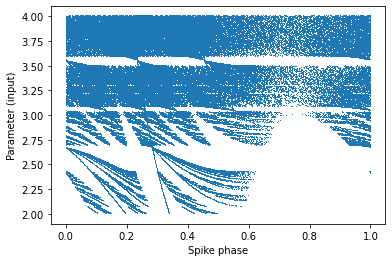

In [6]:
group.run(duration=5 * 1000., report=0.1)

indices, times = bp.measure.raster_plot(group.mon.spike, group.mon.ts)
plt.plot((times % tau) / tau, inputs[indices], ',')
plt.xlabel('Spike phase')
plt.ylabel('Parameter (input)')
plt.show()